# Plot some station data

In [2]:
# Convert the profile
#%run convert_profile.py '../SCENARIOS/OUTPUT_NWS_2km_hex_2013_2014/' 'NWS_2km_hex_2013_2014_Profile.nc'

NWS_2km_hex_2013_2014_Profile.nc
Loading variable eta...
Loading variable uvw...


/home/mrayson/anaconda2/lib/python2.7/site-packages/xarray/core/dataset.py:378: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  both_data_and_coords = [k for k in data_vars if k in coords]


Loading variable salt...
Loading variable temp...
Loading variable kappa_t...
	Profile data saved to NWS_2km_hex_2013_2014_Profile.nc.


In [3]:
import mycurrents.oceanmooring as om
from soda.dataio.suntans.sunprofile import Profile
from soda.dataio.conversion.readotps import tide_pred
from soda.utils.myproj import MyProj
from soda.utils.maptools import plotmap
from soda.utils.otherplot import polar_pdf

#from mpl_toolkits.basemap import Basemap, cm
from matplotlib.colors import LogNorm, PowerNorm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime

import matplotlib as mpl
%matplotlib inline
mpl.rcParams['font.size']=14
mpl.rcParams['axes.labelsize']='large'

In [13]:
#otisfile = '/home/suntans/Share/ScottReef/DATA/TIDES/Ind2016/Model_Ind_2016'
otisfile = '/group/pawsey0106/mrayson/DATA/TIDES/Ind2016/Model_Ind_2016'


#ncfile = '../SCENARIOS/OUTPUT_NWS_2km_hex/NWS_2km_hex_2014_Profile.nc'
ncfile = '../SCENARIOS/OUTPUT_NWS_2km_hex_2013_2014/NWS_2km_hex_2013_2014_Profile.nc'

sun = Profile(ncfile)

# Load some IMOS mooring data

(<matplotlib.contour.QuadContourSet at 0x2aeca8becd10>, None)

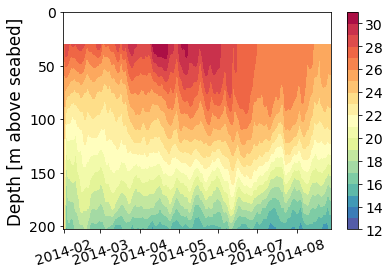

In [65]:
#datafile = '/home/suntans/Share/ARCHub/DATA/FIELD/IMOS/IMOS_Gridded_Mooring_T_PILKIMTIS.nc'
datafile = '/group/pawsey0106/mrayson/DATA/FIELD/IMOS/IMOS_Gridded_Mooring_T_PILKIMTIS.nc'


#ds = om.from_netcdf(datafile, 'watertemp', group='PIL200_2014_a')
#ds = om.from_netcdf(datafile, 'watertemp', group='PIL200_2013_b')
ds = om.from_netcdf(datafile, 'watertemp', group='KIM200_2013_b')
ds2 = om.from_netcdf(datafile, 'watertemp', group='KIM200_2014_a')




dslow = om.OceanMooring(ds.t, ds.filt(34*3600.), -ds.Z, positive='down')
dslow2 = om.OceanMooring(ds2.t, ds2.filt(34*3600.), -ds2.Z, positive='down')


ds.X, ds.Y
plt.figure()
dslow.contourf(np.arange(12,32,1))
dslow2.contourf(np.arange(12,32,1), cbar=False)



# Plot the water level at P200

In [50]:
# Set the project
P = MyProj('merc')
xstation, ystation = P.to_xy(ds.X,ds.Y)

In [51]:
# Load the station data

eta = sun(xstation, ystation, 0, 'eta')

In [52]:
# Grab the OTIS data at the same location
lon, lat = P.to_ll(xstation, ystation)
print(lon, lat)

(121.24325000000002, -15.534999999999071)


In [37]:
eta_otis, u_otis, v_otis = tide_pred(otisfile, np.array([lon,lon]), np.array([lat,lat]), eta.time.values)

Interpolating consituent: M2...
Interpolating consituent: S2...
Interpolating consituent: N2...
Interpolating consituent: K2...
Interpolating consituent: K1...
Interpolating consituent: O1...
Interpolating consituent: P1...
Interpolating consituent: Q1...


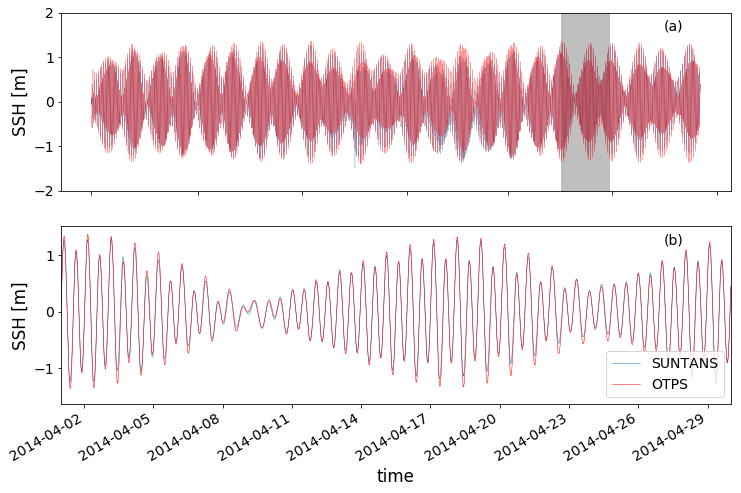

In [38]:
t1 = datetime(2014,4,1)
t2 = datetime(2014,4,30)

plt.figure(figsize=(12,8))
ax=plt.subplot(211)
eta.plot(lw=0.2)
plt.plot(eta.time.values, eta_otis[:,0],'r',lw=0.2)
plt.title('')
plt.fill_between([t1,t2],[3,3],color='0.5',alpha=0.5, lw=0, edgecolor=None)
plt.fill_between([t1,t2],[-3,-3],color='0.5',alpha=0.5, lw=0, edgecolor=None)
plt.ylabel('SSH [m]')
plt.text(0.9,0.9, '(a)', transform=ax.transAxes)
plt.ylim(-2,2)

ax=plt.subplot(212)
eta.plot(lw=0.5)
plt.plot(eta.time.values, eta_otis[:,0],'r',lw=0.5)
plt.title('')
plt.ylabel('SSH [m]')
plt.xlim(t1,t2)
plt.text(0.9,0.9, '(b)', transform=ax.transAxes)
plt.legend(('SUNTANS','OTPS'),loc='best')

# Plot a polar histogram of the surface speed and direction

In [39]:
uc = sun(xstation, ystation, 5, 'uc')
vc = sun(xstation, ystation, 5, 'vc')


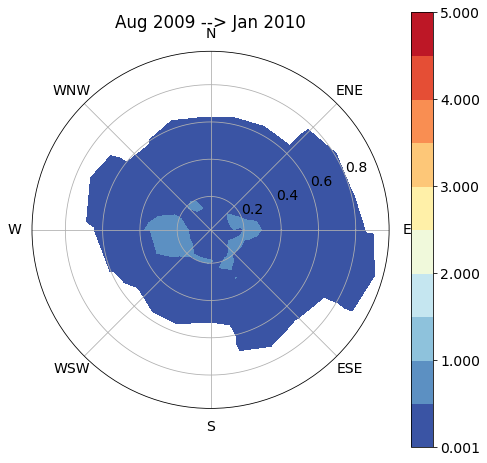

In [40]:
plt.figure(figsize=(8,8))
h,ax= polar_pdf(uc.values.ravel(), vc.values.ravel(), ndirbins=24,nspeedbins=25)
plt.colorbar(h)
plt.title('Aug 2009 --> Jan 2010')

(Timestamp('2014-01-31 00:00:00', freq='M'), Timestamp('2014-02-28 00:00:00', freq='M'))
(Timestamp('2014-02-28 00:00:00', freq='M'), Timestamp('2014-03-31 00:00:00', freq='M'))
(Timestamp('2014-03-31 00:00:00', freq='M'), Timestamp('2014-04-30 00:00:00', freq='M'))
(Timestamp('2014-04-30 00:00:00', freq='M'), Timestamp('2014-05-31 00:00:00', freq='M'))
(Timestamp('2014-05-31 00:00:00', freq='M'), Timestamp('2014-06-30 00:00:00', freq='M'))
(Timestamp('2014-06-30 00:00:00', freq='M'), Timestamp('2014-07-31 00:00:00', freq='M'))
(Timestamp('2014-07-31 00:00:00', freq='M'), Timestamp('2014-08-31 00:00:00', freq='M'))
(Timestamp('2014-08-31 00:00:00', freq='M'), Timestamp('2014-09-30 00:00:00', freq='M'))
(Timestamp('2014-09-30 00:00:00', freq='M'), Timestamp('2014-10-31 00:00:00', freq='M'))
(Timestamp('2014-10-31 00:00:00', freq='M'), Timestamp('2014-11-30 00:00:00', freq='M'))


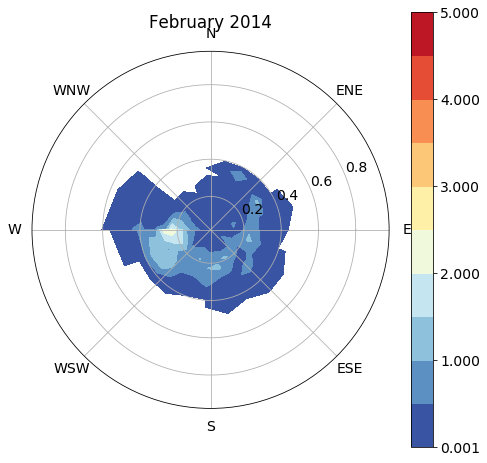

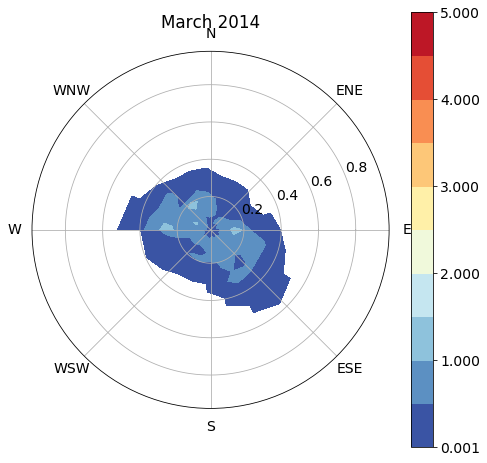

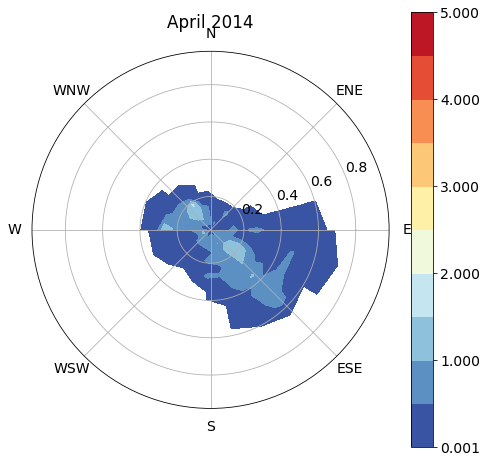

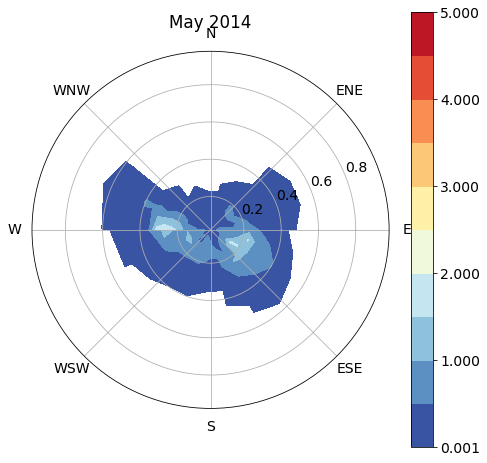

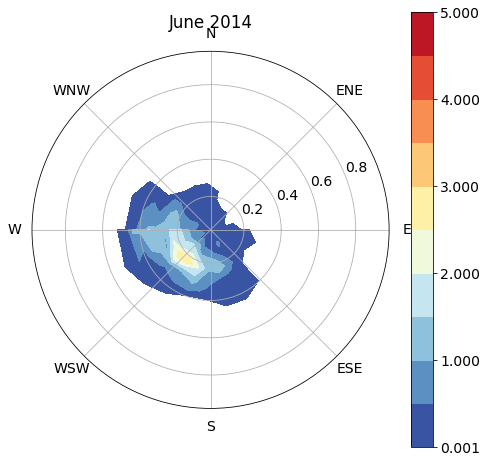

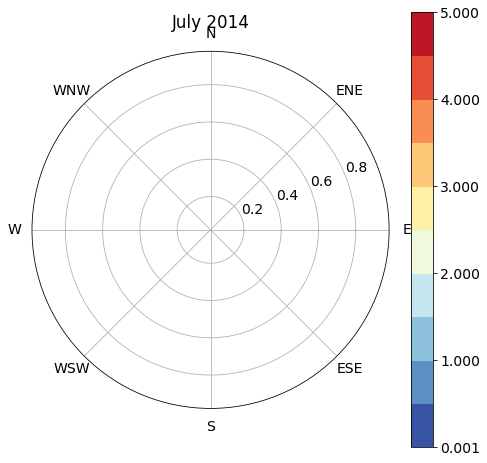

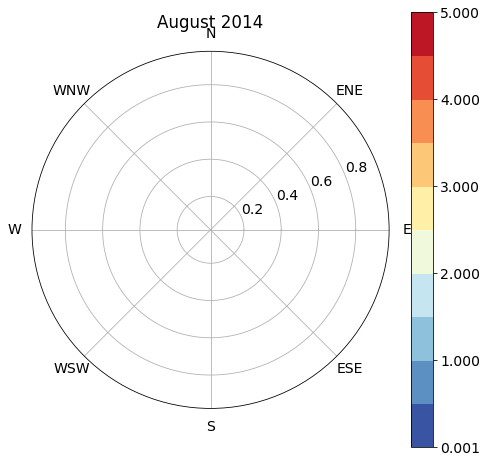

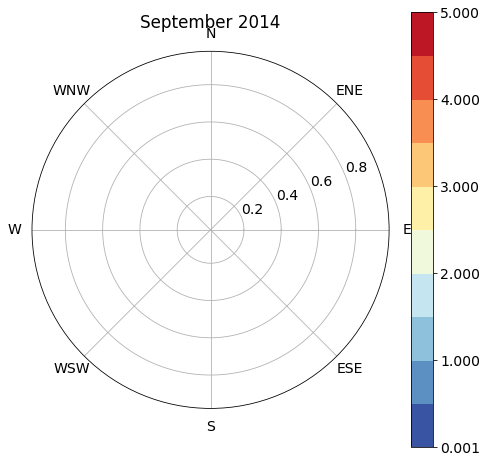

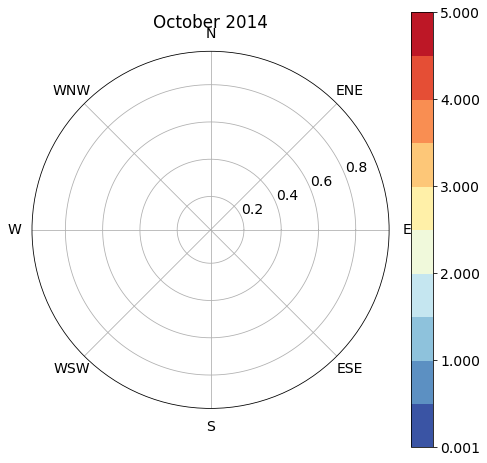

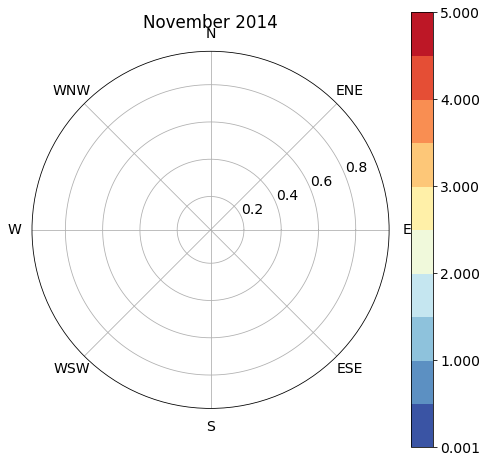

In [41]:
# Plot in polar coordinates month by month

trange = pd.date_range('2014-01-01','2014-12-1',freq='M')
for t1s, t2s in zip(trange[:-1], trange[1:]):
    print(t1s, t2s)
    umo = uc.sel(time=slice(t1s,t2s))
    vmo = vc.sel(time=slice(t1s,t2s))
    
    plt.figure(figsize=(8,8))
    h,ax= polar_pdf(umo.values.ravel(), vmo.values.ravel(), ndirbins=24)
    plt.colorbar(h)
    plt.title(t2s.strftime('%B %Y'))

# Load a station 

In [53]:

uc = sun(xstation, ystation, None, 'uc')
temp = sun(xstation, ystation, None, 'temp')

In [54]:
# Convert to oceanmooring objects to use its plotting routines
u_itf = om.OceanMooring(uc.time.values, uc.values.squeeze(),uc.z_r.values,\
                positive='down')
T_itf = om.OceanMooring(temp.time.values, temp.values.squeeze(), temp.z_r.values,\
                positive='down')

In [60]:
# Low-pass filter the data
Tlow_itf = om.OceanMooring(T_itf.t,  T_itf.filt(72*3600., btype='low'), T_itf.Z)
ulow_itf = om.OceanMooring(u_itf.t,  u_itf.filt(72*3600., btype='low'), u_itf.Z)

(200, 0)

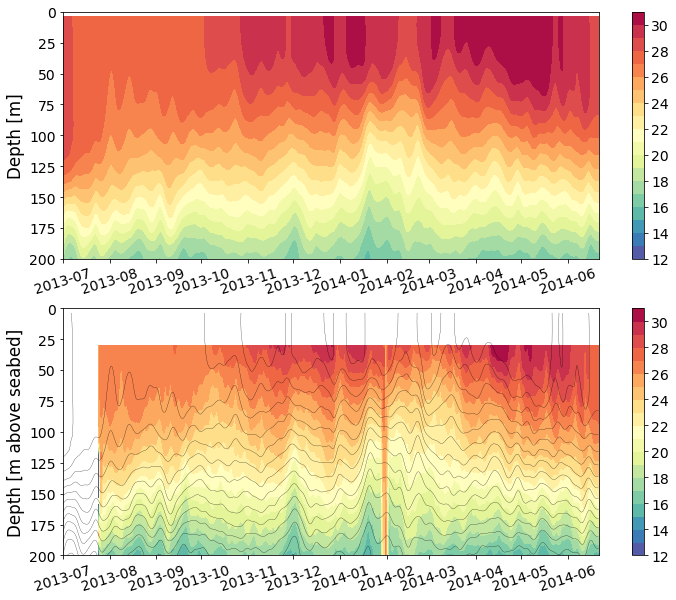

In [67]:
# Temperature only
plt.figure(figsize=(12,10))

plt.subplot(2,1,1)
Tlow_itf.contourf(np.arange(12,32,1.), filled=True)

plt.ylim(200,0)
plt.ylabel('Depth [m]')


plt.subplot(2,1,2)
dslow.contourf(np.arange(12,32,1.),)
dslow2.contourf(np.arange(12,32,1.),cbar=False)

Tlow_itf.contourf(np.arange(12,32,1.), filled=False, cbar=False)

plt.xlim(Tlow_itf.t[0], Tlow_itf.t[-1])
plt.ylim(200,0)

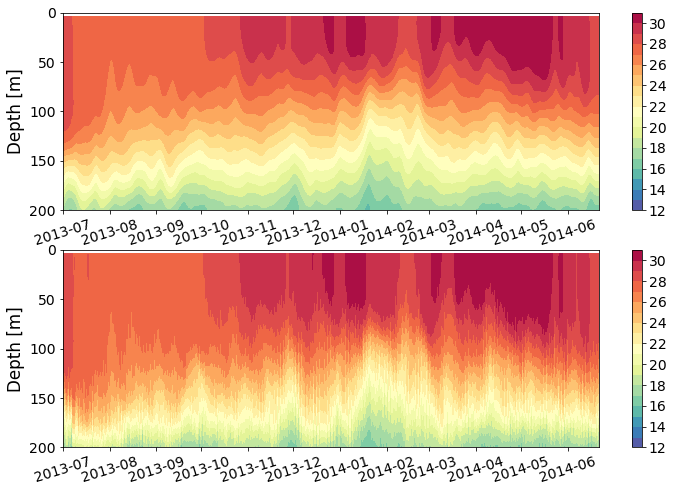

In [68]:
# Upper 300 m

plt.figure(figsize=(12,8))
plt.subplot(211)
Tlow_itf.contourf(np.arange(12,32,1.), filled=True)
plt.ylim(200,0)
plt.ylabel('Depth [m]')

plt.subplot(212)
T_itf.contourf(np.arange(12,32,1.), filled=True)
plt.ylim(200,0)
plt.ylabel('Depth [m]')

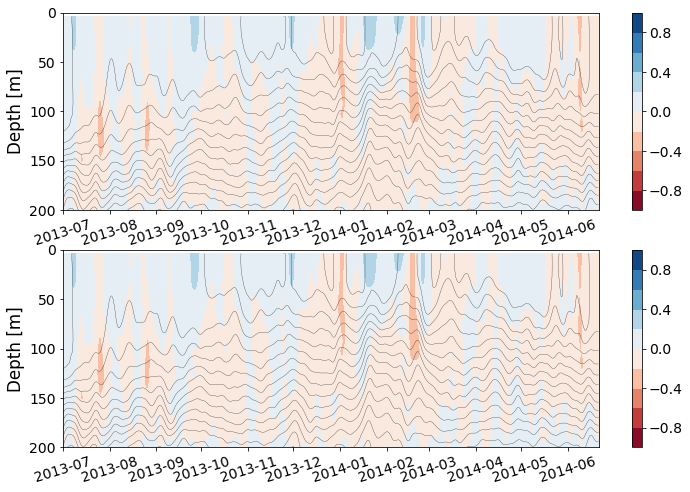

In [69]:
# Temperature and velocity
plt.figure(figsize=(12,8))
plt.subplot(211)
ulow_itf.contourf(np.arange(-1.,1.2,0.2), cmap='RdBu', filled=True, cbar=True)
Tlow_itf.contourf(np.arange(12,32,1.), filled=False, cbar=False)

plt.ylim(200,0)
plt.ylabel('Depth [m]')

plt.subplot(212)
ulow_itf.contourf(np.arange(-1.,1.2,0.2), cmap='RdBu', filled=True, cbar=True)
Tlow_itf.contourf(np.arange(12,32,1.), filled=False, cbar=False)

plt.ylim(200,0)
plt.ylabel('Depth [m]')

(735324.0, 735353.0)

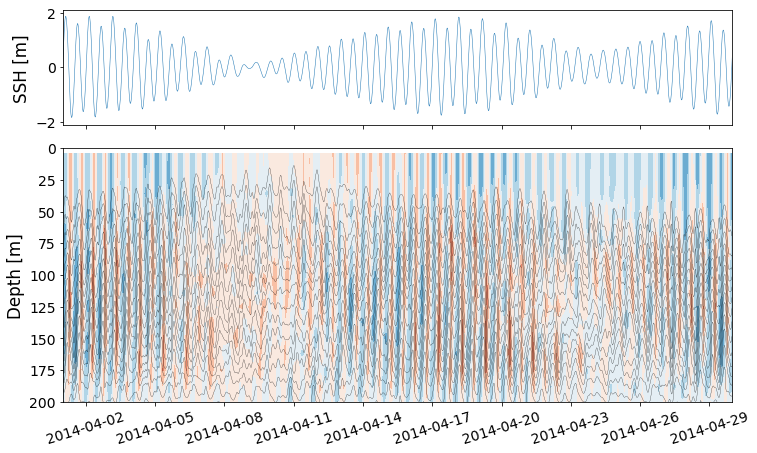

In [70]:
# Temperature and velocity
plt.figure(figsize=(12,8))
ax=plt.subplot2grid((3,1),(0,0), rowspan=1)
eta.plot(lw=0.5)
ax.set_xticklabels([])
plt.xlabel('')
plt.title('')
plt.ylabel('SSH [m]')
plt.xlim(t1,t2)

plt.subplot2grid((3,1),(1,0), rowspan=2)
u_itf.contourf(np.arange(-1.,1.2,0.2), cmap='RdBu', filled=True, cbar=False)
T_itf.contourf(np.arange(12,32,1.), filled=False, cbar=False)

plt.ylim(200,0)
plt.ylabel('Depth [m]')
plt.xlim(t1,t2)